<div dir=rtl>
نام و نام‌خانوادگی: مهدی سلمانی صالح‌آیادی 
    <br/>
    شماره دانشجویی: 98105824
</div>

<div dir="rtl">
    <h3>
        بخش اول: بررسی داده‌ها و رسم نمودار و جداسازی
    </h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,X1,X2,Y
0,0,0.004291,-0.174600,-1
1,1,2.225050,0.117181,1
2,2,0.274173,-0.514910,-1
3,3,-1.045133,-0.798009,1
4,4,1.611457,0.239339,1


<div dir="rtl">
        در قسمت زیر بررسی کردم که داده nan نداشته باشیم.
        با بررسی انجام شده می‌توان فهمید که داده nan نداریم.
</div>

In [4]:
count = df.isna().sum()
percentage = count / len(df) * 100
print('number of nans in each column: ')
print(count)
print('percentage of nans in each column: ')
print(percentage)

number of nans in each column: 
Unnamed: 0    0
X1            0
X2            0
Y             0
dtype: int64
percentage of nans in each column: 
Unnamed: 0    0.0
X1            0.0
X2            0.0
Y             0.0
dtype: float64


In [5]:
df.describe()

,Unnamed: 0,X1,X2,Y
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,0.134422,-0.032272,0.000000
std,57.879185,0.963356,0.936228,1.002509
min,0.000000,-2.295103,-2.979597,-1.000000
25%,49.750000,-0.565908,-0.541366,-1.000000
50%,99.500000,0.176662,0.028769,0.000000
75%,149.250000,0.802764,0.570275,1.000000
max,199.000000,2.679910,2.467651,1.000000


<div dir="rtl">
       در قسمت زیر همانطور که می‌بینید داده‌ها خطی تفکیک‌پذیر نیستند.
</div>

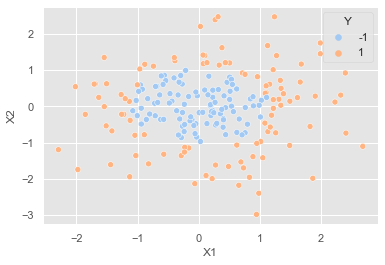

In [6]:
sns.scatterplot(df['X1'], df['X2'], hue=df['Y'], palette="pastel");

<div dir="rtl">
    دقت کنید که چون تعداد داده‌ها کم است،
    در اینجا داده‌های تست و آموزش را به نسبت 30 70 تقسیم کرده‌ام تا نتیجه تست قابل اتکا تر باشد.
</div>

In [7]:
train = df.sample(frac=0.7, random_state=0)
test = df.drop(train.index)
len(train)

140

In [8]:
y_train, y_test = train['Y'], test['Y']
X_train, X_test = train.drop('Y', axis=1), test.drop('Y', axis=1)

<div dir="rtl">
    <h3>
        بخش دوم:
        Adaboost
    </h3>
</div>

In [9]:
from sklearn.tree import DecisionTreeClassifier 

<div dir="rtl">
    برای H
    از 
    DecisionTree
    با عمق یک استفاده کردم.
    دقت کنید در Adaboost
    گفتیم تابع دسته بند باید ساده باشد و بایاس زیادی داشته‌باشد برای همین درخت با عمق یک را انتخاب کردم.
</div>

In [10]:
def calculate_epsilon(prediction, y, w):
    return w[y != prediction].sum() / w.sum()

def ADABOOST(X, y, step):
    w = np.full(len(X), 1 / len(X))
    alphas = []
    trees = []
    for i in range(step):
        tree = DecisionTreeClassifier(max_depth=1, random_state=0)
        tree.fit(X, y, sample_weight=w)
        prediction = tree.predict(X)
        epsilon = calculate_epsilon(prediction, y, w)
        alpha = 0.5 * np.log((1 - epsilon) / epsilon)
        normalization_factor = 2 * np.sqrt(epsilon * (1 - epsilon))
        w = w * np.exp(-alpha * (y * prediction)) / normalization_factor
        trees.append(tree)
        alphas.append(alpha)
    return trees, alphas

<div dir="rtl">
    در تابع زیر 
    بخش مربوط به 
    prediction
    با توجه به وزن هر درخت انجام می‌شود.
</div>

In [11]:
def prediciton_ADABOOST(X, alphas, trees, step):
    y = np.zeros(len(X))
    for i in range(step):
        y += trees[i].predict(X) * alphas[i]
  
    return np.where(y > 0, 1, -1)

<div dir="rtl">
   در این قسمت تعیین کردم که 30 درخت ساخته شود.
    در ادامه ضریب مربوط به هر درخت چاپ شده‌است.
</div>

In [12]:
step = 30
trees, alphas = ADABOOST(X_train, y_train, step)
print('alphas : ', alphas)

alphas :  [0.3573266928904548, 0.2610946912081534, 0.33145008377892976, 0.24724026738273583, 0.35779835783944913, 0.2494822955951891, 0.38040975560012397, 0.2603105361885072, 0.37219212389626033, 0.2566883783559921, 0.3231966310064663, 0.24268895950539057, 0.2960598782320418, 0.22725634124021743, 0.2787961984654715, 0.21705256567059322, 0.25943514825723235, 0.2052376891027455, 0.2687447747185123, 0.2109686533247362, 0.30587449221425816, 0.21384255926345028, 0.32429187844376184, 0.28965836326919925, 0.34727420713849777, 0.24985852286471785, 0.1992441917579927, 0.2573291560555724, 0.20392826330240105, 0.24162107962742405]


In [13]:
prediction = prediciton_ADABOOST(X_test, alphas, trees, step)

<div dir="rtl">
    <h3>
        بخش سوم: محاسبه accuracy
    </h3>
</div>

In [14]:
true_labeled = (prediction == y_test)
print('accuracy: ', true_labeled.sum() / len(prediction))

accuracy:  0.9333333333333333
